In [1]:
import sys
import os

# Add the src folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'src')))

import numpy as np
import matplotlib.pyplot as plt

from mesh import *
from geometry import *
import material
import cross_section
import beam_element
import structure
import solver

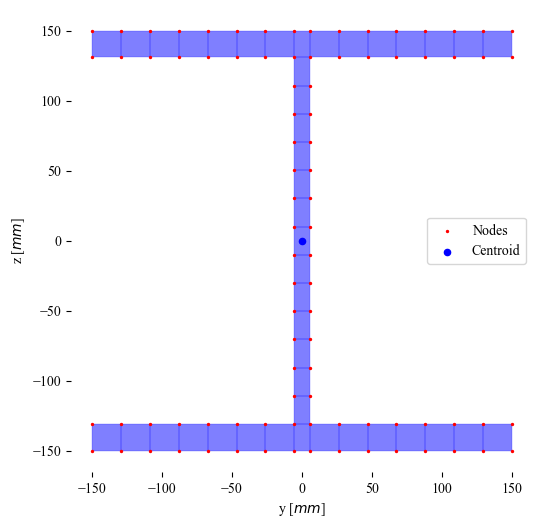

In [2]:
HEB_300 = H_beam(web_width     =  11.0,
                 web_height    = 262.0,
                 flange_width  = 300.0,
                 flange_height =  19.0)
beam = Mesh(HEB_300, mesh_type="quadrilateral", mesh_size=20)
beam.plot()


In [3]:
struc_6  = structure.Cantilever(beam        = beam, 
								length      = 1000, 
								load_DOFs   = [6+2],
								nodal_loads = [1],
								number_of_sections_per_elemnt = 10)

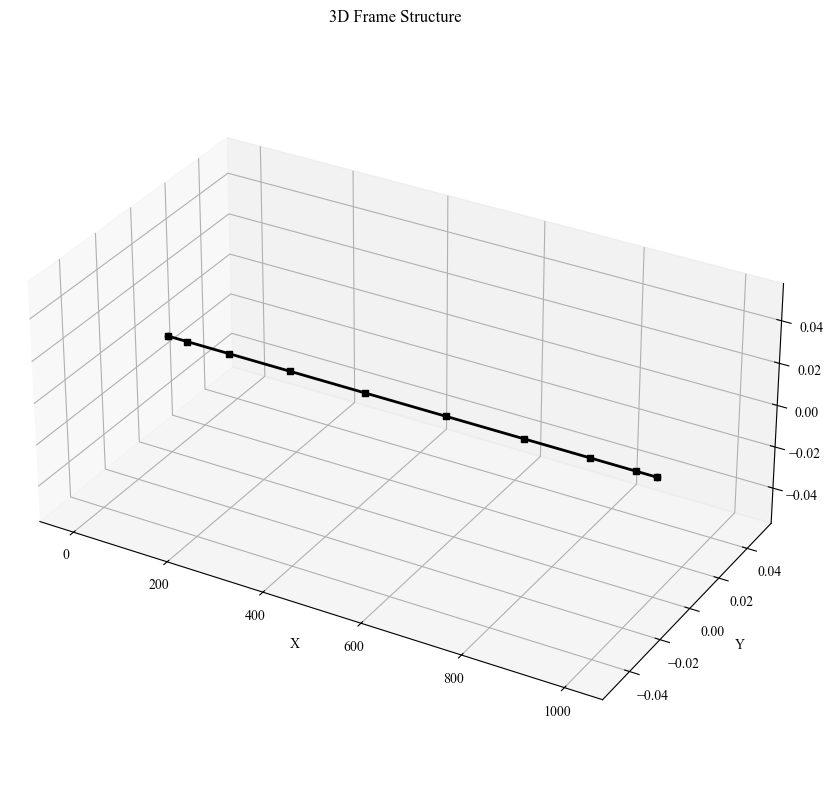

In [4]:
lin_solver = solver.Linear(struc_6)
lin_solver.plot_initial_structure()

In [5]:
non_linear_solver_6  = solver.Nonlinear(struc_6, 
									    constraint     ="Displacement", 
									    controlled_DOF = 8)

In [6]:
increments = np.zeros(400)
increments.fill(0.05)

from contextlib import redirect_stdout
with open(os.devnull, 'w') as f, redirect_stdout(f):
	u_history_6 , lambda_history_6  = non_linear_solver_6.solve(increments)[0:2]

  0%|          | 0/400 [00:00<?, ?it/s]

In [7]:
import csv 

lambdaArray = []
dispArray = []
with open('opensees_S.csv', mode='r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header
    for row in reader:
        lambdaArray.append(float(row[0]))
        dispArray.append(float(row[1]))

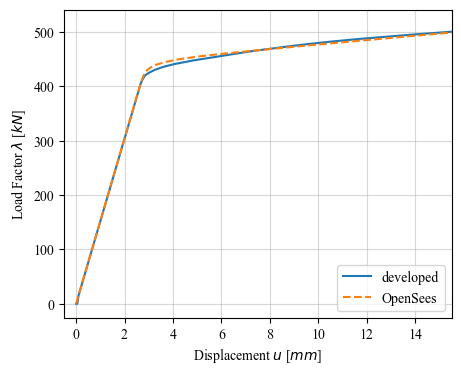

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Main figure and axes
fig, ax = plt.subplots(figsize=(5, 4))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 300

ls=["dashdot", (0, (3, 5, 1, 5, 1, 5)),"dashed", "dotted","-"]

ax.plot(u_history_6[:,6+2], lambda_history_6/1000,   label="developed", ls="-")
ax.plot(dispArray, lambdaArray,   label="OpenSees", ls="--")
ax.set_xlabel("Displacement $u$ [$mm$]")
ax.set_ylabel("Load Factor $\\lambda$ [$kN$]")
ax.legend(loc="lower right")
ax.set_xlim(-0.5, 15.5)
ax.grid(alpha=0.5)

plt.show()